Using the data in 'WHO-COVID-19-global-data.csv', learn a polynomial linear regression model that predicts the cumulative number of cases of COVID-19 in India for next few days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_WHO = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
df_WHO.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
df_India = df_WHO[df_WHO[' Country']== 'India']

In [5]:
df_India.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28608,2020-01-03,IN,India,SEARO,0,0,0,0
28609,2020-01-04,IN,India,SEARO,0,0,0,0
28610,2020-01-05,IN,India,SEARO,0,0,0,0
28611,2020-01-06,IN,India,SEARO,0,0,0,0
28612,2020-01-07,IN,India,SEARO,0,0,0,0


In [6]:
def PolynomialRegression(x,t, M):
  X= np.array([x**m for m in range(M+1)]).T
  w=np.linalg.inv(X.T@X)@X.T@t
  y= X@w
  error= t-y
  return w,y, error

In [7]:
def PolynomialRegression_test(x,M,w):
  X=np.array([x**m for m in range(M+1)]).T
  y=X@w
  return y

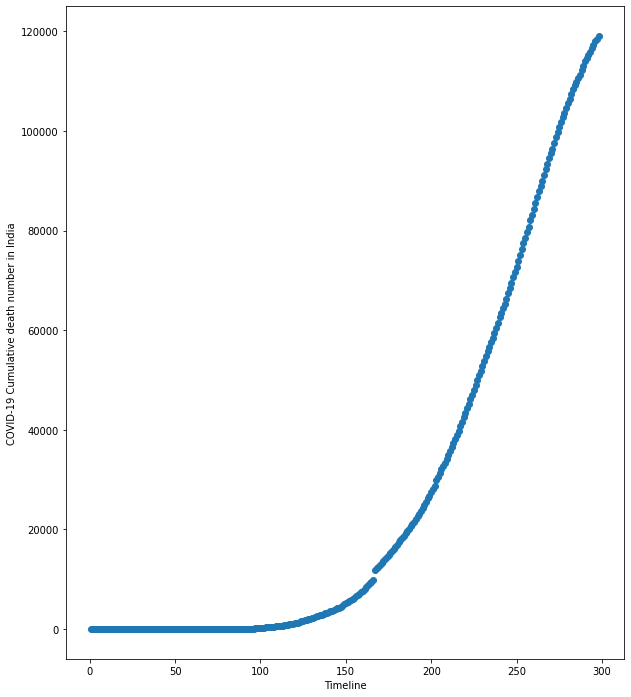

In [10]:
deaths = df_India[' Cumulative_deaths'].to_numpy()
days = np.array(range(1, len(df_India)+1))

plt.figure(figsize=(10,12))
plt.scatter(days, deaths)
plt.xlabel('Timeline')
plt.ylabel('COVID-19 Cumulative death number in India');

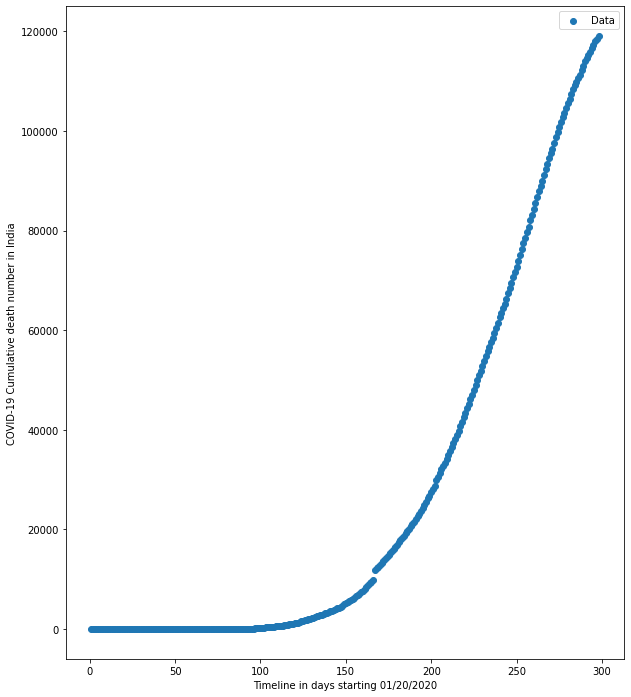

In [12]:
M=2
w, y, error=PolynomialRegression(days, deaths, M);

plt.figure(figsize=(10,12))
plt.scatter(days, deaths, label='Data')
plt.xlabel('Timeline in days starting 01/20/2020')
plt.ylabel('COVID-19 Cumulative death number in India')
plt.legend();

Considering last 30days:

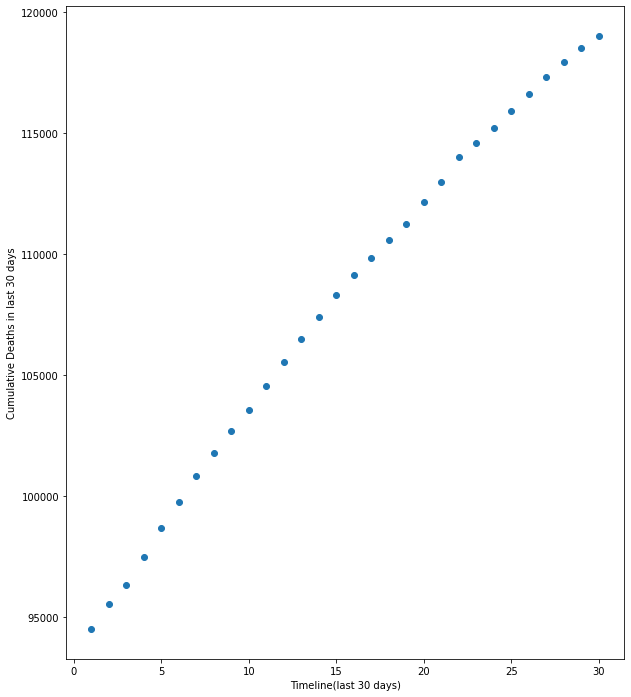

In [17]:
days30 =np.array(range(1,31))
deaths30=deaths[-30:]

plt.figure(figsize=(10,12))
plt.scatter(days30, deaths30)
plt.xlabel('Timeline(last 30 days)')
plt.ylabel('Cumulative Deaths in last 30 days');

Fit a regression model:

In [16]:
M=2
w30, y30, error = PolynomialRegression(days30, deaths30, M);


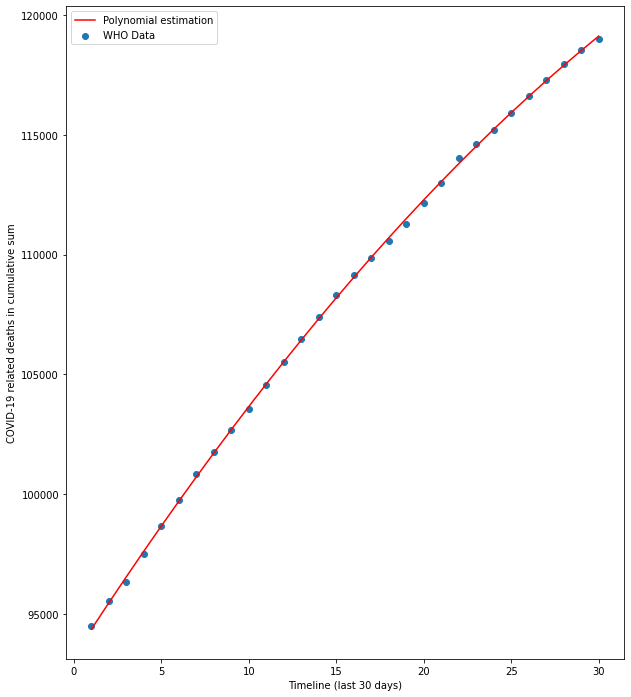

In [22]:
plt.figure(figsize=(10,12))
plt.scatter(days30, deaths30, label='WHO Data')
plt.plot(days30, y30, 'r', label='Polynomial estimation')
plt.xlabel('Timeline (last 30 days)')
plt.ylabel('COVID-19 related deaths in cumulative sum')
plt.legend();

Now, prediction over next 2 days:

In [24]:
days_test = np.array([31,32])

In [25]:
PolynomialRegression_test(days_test, M, w30)

array([119704.07044335, 120270.7396949 ])

The predicted cumulative total deaths for October 27th, 28th is approximately 119704 and 120271 respectively.

In [26]:
PolynomialRegression_test(days_test, M, w30)-deaths30[-1]

array([ 690.07044335, 1256.7396949 ])

This above number 690 corresponds to predicted deaths for 27th October. The difference of 1257 from 690 ~ 567 is approximate predicted death number for 28th October.

This Notebook prediction is based on simple regression and thus error is expected to be high. To get more realistic numbers, we can use better forecasting algorithms where we can consider more factors into consideration.    